# Importing Libraries

In [23]:
import numpy as np
import pandas as pd

In [83]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Load csv data file

In [4]:
data = pd.read_csv('dataframe_.csv')

In [5]:
data

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]

# Plotting the data

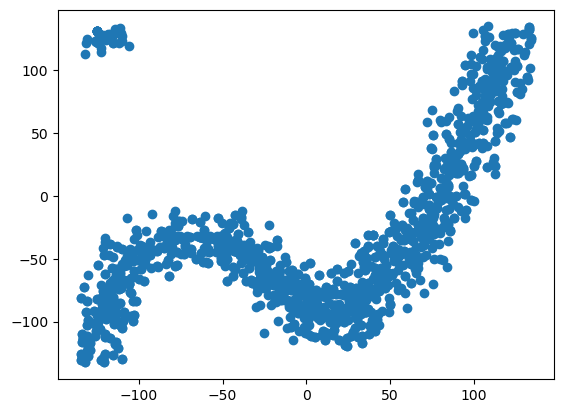

In [9]:
plt.plot(data.input,data.output, 'o')
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


# Removing null values

In [54]:
data.isnull().sum()

input     1
output    1
dtype: int64

In [58]:
data = data.dropna()


In [59]:
data.isnull().sum()

input     0
output    0
dtype: int64

# Splitting the data

In [60]:
x = np.array(data.input)
x = x.reshape(-1,1)
y = np.array(data.output)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# Training the model based on Linear Regression

In [61]:
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

## Prediction

In [82]:
output_predict = model.predict(x_test)


 ## Performance

In [64]:
print('Performance: %.2f' % r2_score(y_test, output_predict))

Performance: 0.34


# Training the model using XGBoost Regressor

In [66]:
#It performs better than Linear Regression
#XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling and is bound to perform better
from xgboost import XGBRegressor


In [68]:
xg_model = XGBRegressor()
xg_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
y_pred = xg_model.predict(x_test)

## Performance

In [71]:
mse = mean_squared_error(y_test, y_pred)

In [72]:
print("MSE: %.2f" % mse)

MSE: 1138.17


In [81]:
print('Performance: %.2f' % r2_score(y_test, y_pred))

Performance: 0.76
